# Pre processing

In [1]:
!pip install split_folders

In [2]:
import splitfolders

In [3]:
input_folder = r"C:\Users\kethu\Videos\data-set\Input_dataset"
output = r"C:\Users\kethu\Videos\data-set\processed_data"
splitfolders.ratio(input_folder, output, seed=42, ratio=(.6, .2, .2))

Copying files: 15515 files [01:06, 235.08 files/s]


In [4]:
help(splitfolders.ratio)

Help on function ratio in module splitfolders.split:

ratio(input, output='output', seed=1337, ratio=(0.8, 0.1, 0.1), group_prefix=None, move=False)



# ResNet50

In [5]:
# Libraries

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, Dense, GlobalAveragePooling2D, MaxPool2D, BatchNormalization
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

In [6]:
# Define parameters
img_height, img_width = (244,244)
BATCH_SIZE = 32
EPOCHS = 20

In [7]:
train_dir = r"C:\Users\kethu\Videos\data-set\processed_data\train"
val_dir = r"C:\Users\kethu\Videos\data-set\processed_data\val"
test_dir = r"C:\Users\kethu\Videos\data-set\processed_data\test"

In [8]:
# train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
#     rescale=1./255,
#     rotation_range=20,
#     zoom_range=0.15,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.15,
#     horizontal_flip=True,
#     fill_mode="nearest",
#     validation_split=0.4 
# )
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  
    rotation_range=30,  # Increase the rotation range
    zoom_range=0.2,  # Increase zoom
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,  # You can increase the shear range as discussed
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.4  # Keep the validation split
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
) # set as training data

validation_generator = train_datagen.flow_from_directory(
    val_dir ,
    target_size=(img_height, img_width),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
) # set as validation data

test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation'
) # set as validation data

Found 5589 images belonging to 12 classes.
Found 1237 images belonging to 12 classes.
Found 1239 images belonging to 12 classes.


In [9]:
for x, y in test_generator:
    print(x.shape)
    break  # Remove this to iterate over all batches


(1, 244, 244, 3)


In [10]:
num_classes = len(train_generator.class_indices)
print(num_classes)

12


In [11]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=EPOCHS
)


Epoch 1/20


D:\App\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


175/175 ━━━━━━━━━━━━━━━━━━━━ 705s 4s/step - accuracy: 0.7202 - loss: 0.9293
Epoch 2/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 340s 2s/step - accuracy: 0.9330 - loss: 0.2075
Epoch 3/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 311s 2s/step - accuracy: 0.9483 - loss: 0.1577
Epoch 4/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.9686 - loss: 0.1084
Epoch 5/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 348s 2s/step - accuracy: 0.9738 - loss: 0.0877
Epoch 6/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 350s 2s/step - accuracy: 0.9784 - loss: 0.0695
Epoch 7/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.9808 - loss: 0.0633
Epoch 8/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - accuracy: 0.9852 - loss: 0.0530
Epoch 9/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.9855 - loss: 0.0518
Epoch 10/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 337s 2s/step - accuracy: 0.9877 - loss: 0.0430
Epoch 11/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 0.9906 - loss: 0.0386
Epoch 12/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 316s 2s/ste

In [12]:
model.save(r'C:\Users\kethu\Videos\data-set\Saved_model\ResNet50.h5')

In [13]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

1239/1239 - 187s - 151ms/step - accuracy: 0.9177 - loss: 0.2969
Test Accuracy: 91.77%


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

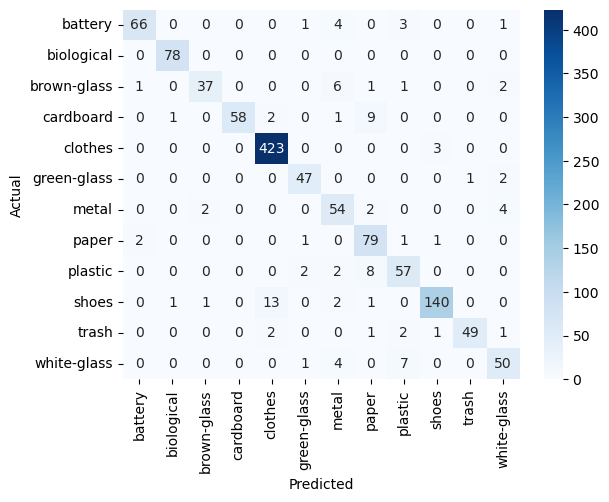

Test Accuracy: 91.85%


In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

model = tf.keras.models.load_model(r'C:\Users\kethu\Videos\data-set\Saved_model\ResNet50.h5')

# Prediction and Confusion Matrix
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob = []
y_act = []

test_generator.reset()
for _ in range(nb_samples):
    X_test, y_test = next(test_generator)  # Use `next()` function here
    y_prob.append(model.predict(X_test))
    y_act.append(y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

# Create a DataFrame for the actual vs predicted classes
out_df = pd.DataFrame(np.vstack([predicted_class, actual_class]).T, columns=['predicted_class', 'actual_class'])

# Confusion Matrix
confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

# Plot Confusion Matrix
sns.heatmap(confusion_matrix, cmap="Blues", annot=True, fmt='d')
plt.show()

# Print test accuracy
accuracy = np.diag(confusion_matrix).sum() / confusion_matrix.sum().sum() * 100
print(f'Test Accuracy: {accuracy:.2f}%')
